In [1]:
import path
import libs.checker as checker
from control import *
from z3 import *
from scipy.signal import lti, step, impulse
import scipy.signal as sig
from matplotlib import pyplot as p

This example is borrowed and adapted from [1], design problem 5.6 on Pg. 360. The following transfer function represents the position control system of a DC motor:
$$ H(s) = \frac{K_1}{s^2+(K_1 K_2+1)s+K_1}$$

[1] Richard C.. Dorf, and Robert H. Bishop. Modern control systems. Pearson Prentice Hall, 2016. Pg. 360

With $K_1 = 121, K_2=0.14$, does the system can expect peak time $T_p \le 0.5$ and $overshoot \le 2\%$ to a step input?

In [2]:
# Constants
K1 = 121
K2 = 0.14
r = 1

# Original Transfer function
Hs_num = [K1]
Hs_den = [1, K1*K2+1, K1]


In [3]:
# Chars calculation
wn_square = Hs_den[-1]
two_zeta_wn = Hs_den[-2]

omega_n = math.sqrt(wn_square)
zeta = two_zeta_wn/(2*omega_n)

print(f'zeta = {zeta}, omega_n = {omega_n}')

zeta = 0.8154545454545455, omega_n = 11.0


In [4]:
# Setup
c = checker.Checker(zeta,omega_n)

# Safety
f = c.factory
t = c.factory.t
safety = And(f.overshoot <= 0.02, f.peak <= 0.5)

# PO Generation
c.auto_pog(safety)

In [5]:
# Numerical Static Checking in Z3 SMT solver
c.result()

static checking result =  unsat


Here, the solver return unsat, which suggests the design met the requirment.

Finally let us verify the design by plotting:

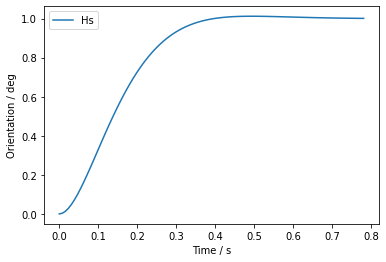

In [6]:
Hs = lti(Hs_num, Hs_den)
t, s = step(Hs)
p.plot(t, s, label='Hs')
p.xlabel('Time / s')
p.ylabel('Orientation / deg')
p.legend()
p.show()